# <span style="color:#54B1FF">Simulating Experiments:</span> &nbsp; <span style="color:#1B3EA9"><b>Multiple Experiments</b></span>

<br>

This notebook simulates multiple one-sample experiments.

Let's first check what happens to the sample mean as the number of experiments ($N$) increases.

<br>

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
N      = 10      # number of experiments
n      = 12      # sample size
mu     = 0       # when H0 is true, the mean is zero
sigma  = 11.155  # assumed true standard deviation


np.random.seed(0)
mm     = []      # a list that will hold sample mean values
for i in range(N):
    y  = mu + sigma * np.random.randn(n)  # random data sample
    m  = y.mean()                      # sample mean
    mm.append( m )

mm     = np.array( mm ) 

print('Sample means (%d iterations)' % N)
print(mm)
print()
print( 'Mean of all simulation results: ', mm.mean() )

Sample means (10 iterations)
[ 8.34630931  0.58660708  1.06815274 -1.76997893 -3.95497179 -4.6111915
 -3.17715984  6.91035231  2.0162656   9.3784553 ]

Mean of all simulation results:  1.4792840278822272


<br>
<br>

Note that the sample mean fluctuates around its true value of zero;  sometimes it is larger than the true value, and sometimes it is smaller.

Let's repeat this for a range of $N$ values, but first let's create a "simulate" function to make the code easier to read.

<br>

In [3]:
def simulate(N):
    mm     = []
    for i in range(N):
        y  = mu + sigma * np.random.randn(n)  # random data sample
        m  = y.mean()                      # sample mean
        mm.append( m )
    return np.array( mm ) 


np.random.seed(0)
mm = simulate(10)

print(mm)
print()
print( 'Mean of all simulation results: ', mm.mean() )

[ 8.34630931  0.58660708  1.06815274 -1.76997893 -3.95497179 -4.6111915
 -3.17715984  6.91035231  2.0162656   9.3784553 ]

Mean of all simulation results:  1.4792840278822272


<br>
<br>

Note that these results are the same as above.  Good!  Now let's repeat the simulation for a variety of $N$ values. For each value of $N$ we will save just the average value across all $N$ experiments.

Note that the code below uses a [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) instead of a [for loop](https://www.learnpython.org/en/Loops) for more compact Python code.

<br>

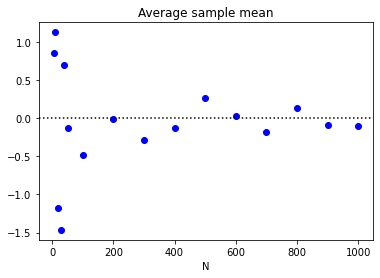

In [4]:
NN     = np.array( [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])   # number of experiments

np.random.seed(0)
MM     = np.array(  [simulate(N).mean() for N in NN]  )



plt.figure()
ax     = plt.axes()
ax.plot(NN, MM, 'o', color='blue')
ax.axhline(0, color='black', linestyle=':')
ax.set_xlabel('N')
ax.set_title('Average sample mean')
plt.show()

<br>
<br>

Note that the average sample mean tends to get closer to its true value of zero as $N$ increases.

This trend is more obvious when plotting the absolute error <span style="color:blue">$| \overline{y} - \mu |$</span> like this:

<br>

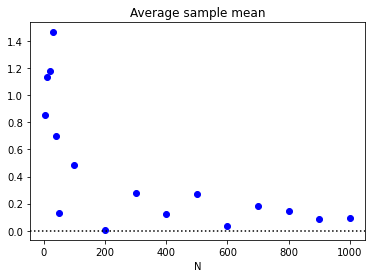

In [5]:
plt.figure()
ax     = plt.axes()
ax.plot(NN, np.abs(MM - mu), 'o', color='blue')
ax.axhline(0, color='black', linestyle=':')
ax.set_xlabel('N')
ax.set_title('Average sample mean')
plt.show()

<br>
<br>

These results show that, on average, the sample mean ($\overline{y}$), converges to its true value ($\mu$) as the number of experiments increases ($N$).

<br>

<span style="color:red">Congratulations!!!</span>  You have just learned the most important principle of classical hypothesis testing.

<br>

The principle can be stated more generally as follows:

<span style="color:red">Small sample descriptors</span> (like the sample mean) <span style="color:red">converge to their true, population values as the number of experiments approaches $\infty$.</span>

<br>

Great!  Now we are ready to consider the meaning of hypotheses testing's p values. This is considered in the next notebook.